## 1. 載入套件與資料集

In [1]:
# Import some useful packages
import matplotlib.pyplot as plt
import numpy as np

# Layers for FNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

# Layers for CNN
from tensorflow.keras.layers import Conv2D, MaxPool2D, GlobalAveragePooling2D
from tensorflow.keras.optimizers import SGD, Adam

# For data preprocessing
from tensorflow.keras import datasets
from tensorflow.keras.utils import to_categorical

## 2. 資料前處理

In [2]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [3]:
# load fashion MNIST dataset
(x_train, y_train0), (x_test, y_test0) = datasets.fashion_mnist.load_data()

# standardized
x_train = x_train / x_train.max()
x_test = x_test / x_test.max()

# One-hot encoding
y_train = to_categorical(y_train0, 10)
y_test = to_categorical(y_test0, 10)

(28, 28)


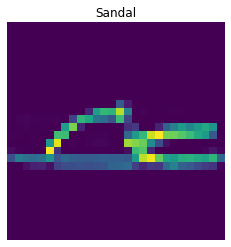

In [4]:
n = 7777
plt.imshow(x_train[n])
plt.title(class_names[y_train0[n].squeeze()])
plt.axis("off");
print(x_train[n].shape)

In [5]:
# 做reshape
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

## 3. 建立用於分類Fashion MNIST的卷積神經網路

In [6]:
CNN_layers = [Conv2D(32, (3, 3), input_shape=(28, 28, 1), padding="same", activation="relu", name="Conv_1"),
              MaxPool2D(),
              Conv2D(64, (3, 3), padding="same", activation="relu", name='Conv_2'),
              MaxPool2D(),
              Conv2D(128, (3, 3), padding="same", activation="relu", name='Conv_3'),
              GlobalAveragePooling2D()]

FC_layers = [Dense(units=100, activation="relu"),
             Dense(units=10, activation='softmax')]

In [7]:
model_fashion = Sequential(CNN_layers + FC_layers)

In [8]:
model_fashion.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv_1 (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
Conv_2 (Conv2D)              (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
Conv_3 (Conv2D)              (None, 7, 7, 128)         73856     
_________________________________________________________________
global_average_pooling2d (Gl (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               1

In [9]:
model_fashion.compile(loss="categorical_crossentropy", optimizer=Adam(), metrics=["accuracy"])

In [10]:
model_fashion.fit(x_train, y_train, batch_size=64, epochs=3, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 29s 483us/sample - loss: 0.8356 - accuracy: 0.6898 - val_loss: 0.6177 - val_accuracy: 0.7620
Epoch 2/3
60000/60000 [==============================] - 34s 566us/sample - loss: 0.5533 - accuracy: 0.7954 - val_loss: 0.5261 - val_accuracy: 0.8113
Epoch 3/3
60000/60000 [==============================] - 37s 610us/sample - loss: 0.4766 - accuracy: 0.8273 - val_loss: 0.4889 - val_accuracy: 0.8216


In [11]:
# 預測資料集的準確率
score_train = model_fashion.evaluate(x_train, y_train)
score_test = model_fashion.evaluate(x_test, y_test)

print(f'Train Accuracy: {score_train[1]*100}')
print(f'Test Accuracy: {score_test[1]*100}')

10000/10000 [==============================] - 1s 105us/sample - loss: 0.4889 - accuracy: 0.8216
Train Accuracy: 83.08166861534119
Test Accuracy: 82.16000199317932


## 4. 利用Transfer Learning的Layer Transfer借上面model的CNN層來訓練分類MNIST資料的模型

In [12]:
y_list = range(0,10)

In [13]:
# 讀MNIST
(u_train, v_train0), (u_test, v_test0) = datasets.mnist.load_data()

# standardized
u_train = u_train / u_train.max()
u_test = u_test / u_test.max()

# One-hot encoding
v_train = to_categorical(v_train0, 10)
v_test = to_categorical(v_test0, 10)

(28, 28)


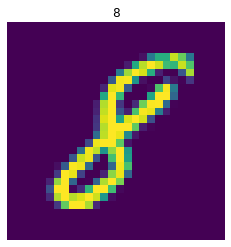

In [15]:
n = 7777
plt.imshow(u_train[n])
plt.title(y_list[v_train0[n].squeeze()])
plt.axis("off");
print(u_train[n].shape)

In [16]:
# reshape
u_train = u_train.reshape(60000, 28, 28, 1)
u_test = u_test.reshape(10000, 28, 28, 1)

In [17]:
FC_layers_mnist = [Dense(units=50, activation='relu'),
                   Dense(units=10, activation='softmax')]

In [18]:
model_mnist = Sequential(CNN_layers+FC_layers_mnist)
model_mnist.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv_1 (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
Conv_2 (Conv2D)              (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
Conv_3 (Conv2D)              (None, 7, 7, 128)         73856     
_________________________________________________________________
global_average_pooling2d (Gl (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 50)               

#### Frozen

In [19]:
for layer in CNN_layers:
    layer.trainable = False

In [20]:
model_mnist.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv_1 (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
Conv_2 (Conv2D)              (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
Conv_3 (Conv2D)              (None, 7, 7, 128)         73856     
_________________________________________________________________
global_average_pooling2d (Gl (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 50)               

In [21]:
model_mnist.compile(loss='categorical_crossentropy', 
                    optimizer=Adam(),
                    metrics=['accuracy'])

model_mnist.fit(u_train, v_train,
                batch_size=64, 
                epochs=3,
                validation_data=(u_test, v_test)
                )

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 7s 123us/sample - loss: 0.9158 - accuracy: 0.7366 - val_loss: 0.4444 - val_accuracy: 0.8768
Epoch 2/3
60000/60000 [==============================] - 8s 136us/sample - loss: 0.3960 - accuracy: 0.8855 - val_loss: 0.3222 - val_accuracy: 0.8994
Epoch 3/3
60000/60000 [==============================] - 8s 136us/sample - loss: 0.3191 - accuracy: 0.9029 - val_loss: 0.2860 - val_accuracy: 0.9113


#### 由上述訓練過程中，可以發現跟已經訓練好的模型借CNN層之後，訓練的效果也很好。